<b><big> Data Project: Stock Market Analysis </b></big>

In this project, stock market data is analyzed and visualized under the following steps:

<br><li> Requesting stock information with pandas from Yahoo finance
<li> Visualization of the stock price change overtime
<li> Daily Return Analysis
<li> Risk Analysis    

<br><small> The project is based on the Udemy Course "Python for Data Analysis and Visualization" by Jose Portilla

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

<b><li> Requesting stock information with pandas from Yahoo finance

In [2]:
# 1st we need to:  pip install pandas-datareader  and then:
import pandas_datareader as web

In [3]:
from datetime import datetime

In [11]:
stock_list = ['AAPL','GOOG','MSFT','AMZN']

end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [15]:
# globals sets the tech_list components into DataFrames
# globals makes the stock into a global variable
# so if we call 'AAPL' it's a dataframe
for stock in stock_list:
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

<li><b> Visualization of the stock price change

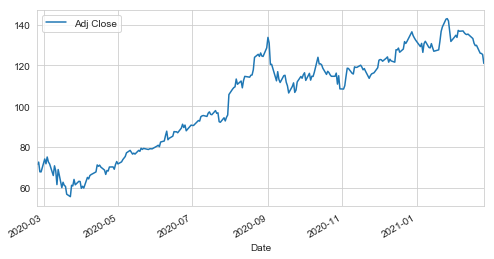

In [17]:
# Let's first plot the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(8,4))

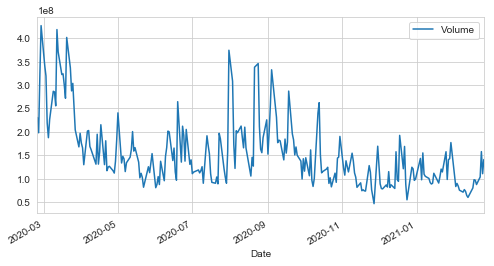

In [18]:
# Total volume of stocks traded each day
AAPL['Volume'].plot(legend=True,figsize=(8,4))

In [19]:
# Calculating the moving averages of the closing price over 10, 20 and 50 days
ma_day = [10,20,50]

for ma in ma_day:
    new_column = "MA for {} days".format(ma)
    AAPL[new_column] = AAPL['Adj Close'].rolling(ma).mean()

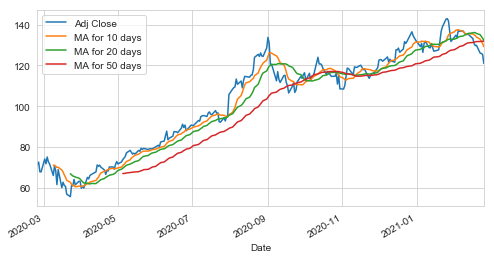

In [20]:
# Plotting the moving averages:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(8,4))

<li><b> Daily Return Analysis

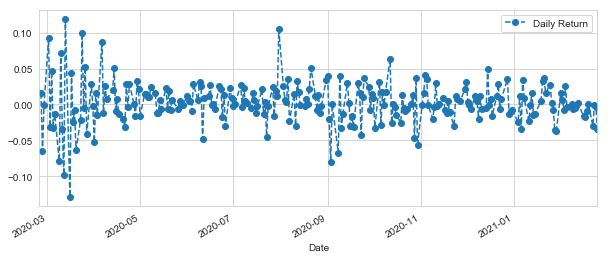

In [21]:
# The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

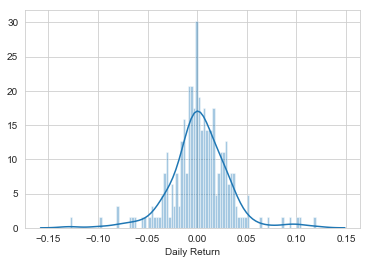

In [22]:
# Histogram of daily returns (using seaborn)
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

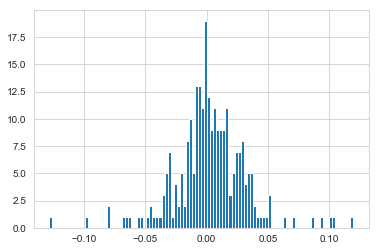

In [23]:
# or in another way (using Panda's built-in histogram)
AAPL['Daily Return'].hist(bins=100)

In [24]:
# analyse the returns of all of the stocks in our list
# create a dataframe specifying that we just want the 'Adj Close' column

closing_price = web.DataReader(stock_list,'yahoo',start,end)['Adj Close']

In [25]:
# pass the percentage change method on the closing_df into a new dataframe
daily_returns = closing_price.pct_change()
daily_returns.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2020-02-25,NaN,NaN,NaN,NaN
2020-02-26,0.015864,0.003472,0.003407,0.012495
2020-02-27,-0.065368,-0.048136,-0.053898,-0.070459
2020-02-28,-0.000585,-0.000292,0.016114,0.024213
2020-03-02,0.093101,0.037266,0.037168,0.066539


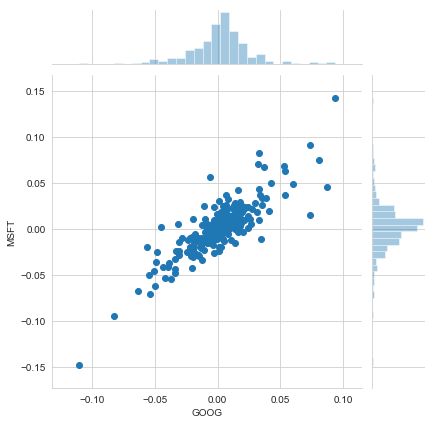

In [26]:
# Compare the daily returns for 2 stocks
# we can see that there is a correlation between google and amazon stock returns
sns.jointplot('GOOG','MSFT',daily_returns,kind='scatter')

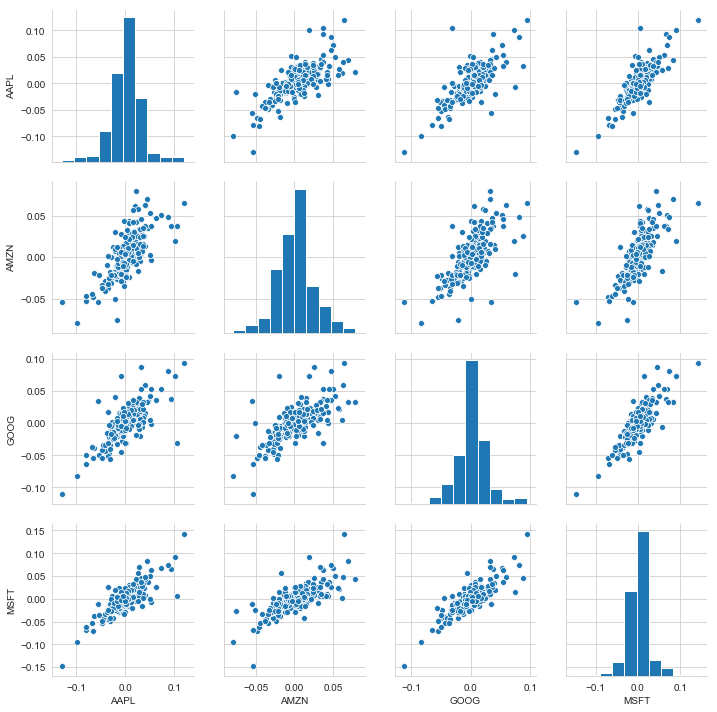

In [27]:
# plot the entire dataframe
sns.pairplot(daily_returns.dropna())

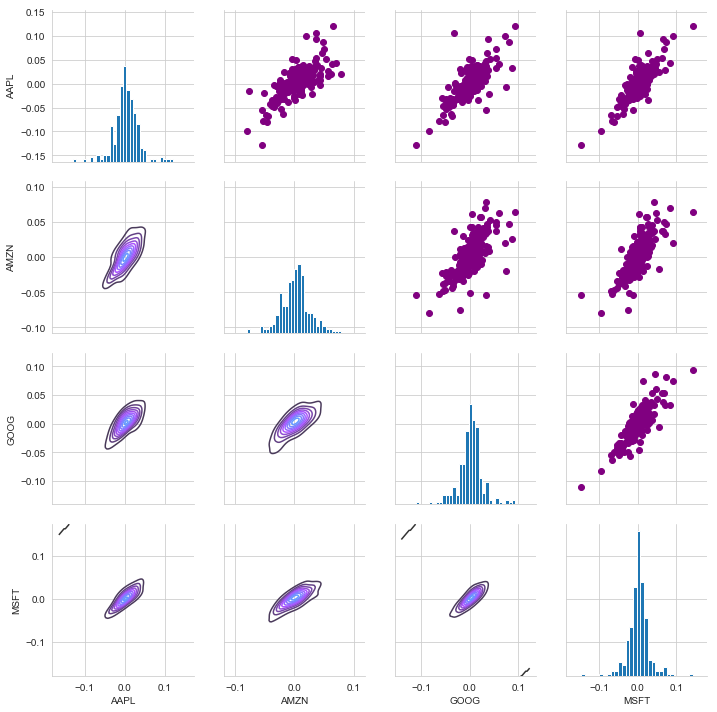

In [28]:
# Different way to plot if we want to fully use seaborn capacities and have more control over our figure

returns_fig = sns.PairGrid(daily_returns.dropna())

# decide what we want the upper triangle (above the diagonal) to look like
returns_fig.map_upper(plt.scatter,color='purple')

# lower triangle
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Diagonal
returns_fig.map_diag(plt.hist,bins=30)

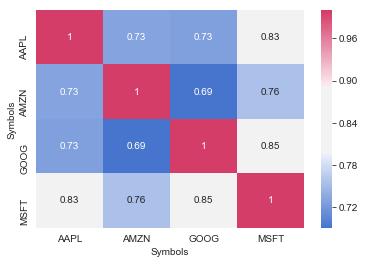

In [29]:
# quick correlation plot
# https://stackoverflow.com/questions/43507756/python-seaborn-how-to-replicate-corrplot
corr = daily_returns.dropna().corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(256,0,sep=80,n=7,as_cmap=True))

<li><b> Risk Analysis 

<u> Standard Deviation </u> 
    
    One of the ways for quantifying risk is to compare the expected daily perecentage return with the standard deviation of the daily returns. It indicates how much the current return is deviating from its expected historical normal returns.
   

In [30]:
# Clean our dataframe
daily_returns = daily_returns.dropna()

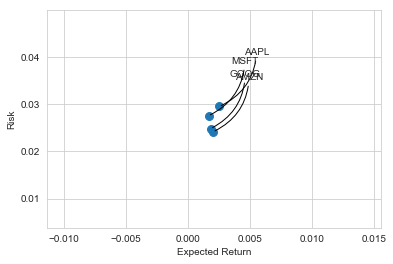

In [31]:
area = np.pi*20

plt.scatter(daily_returns.mean(),daily_returns.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Create atplotlib annotations: https://matplotlib.org/tutorials/text/annotations.html

for label, x, y in zip(daily_returns.columns,daily_returns.mean(),daily_returns.std()): #zip is used to call 3 things at once)
    plt.annotate(label, xy=(x,y), xytext=(50,50),textcoords='offset points',
    ha='right', va='bottom',arrowprops=dict(color='black', arrowstyle='-', 
    connectionstyle='arc3,rad=-0.3'))

<u>Value at Risk </u>
    
    The VaR measures the maximum potential loss with a degree of confidence for a specified period. 

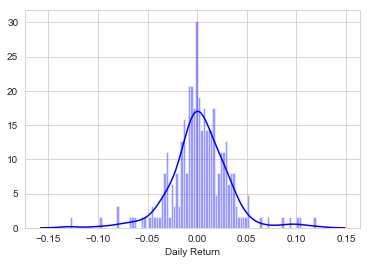

In [32]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='blue')

In [34]:
# We use the quantiles to get the risk value of the stocks
daily_returns['AAPL'].quantile(0.05)
# with 95% confidence (95% of the simulations) the worst daily loss will not exceed 4% of the money.
# Value at risk = 4%  everyday we'll lose at worst 4% of the money

-0.04161977869576143